# Research Notebook (2021)

## Research Topic

The general research topic is about **covert networks** and how they evolve over time. I attempt to derive a model for the dynamic growth of random covert networks. This involves analyzing real covert networks and trying to find specific characteristics within them, and trying to systematically and statistically create generalizable laws.

I'll be documenting all of my work here. I hope I'm able to complete the stuff I plan to.

## Setup

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [36]:
import networkx as nx
import pandas

In [37]:
import scipy
import math
import scipy.stats

## Global Definitions

It's possible that I'll re-use some code or options or something, so I'll just keep a section here to include global stuff. This is different from the *Setup* section because this is moreso about global settings and functions, not about importing libraries.

In [38]:
def g_process_node_data(node_data):
    id_col = node_data["ID"]
    ret = []
    for k in id_col:
        if not(math.isnan(k)):
            ret.append(int(k))
    return ret

In [39]:
def g_process_link_data(link_data):
    id_col = link_data["ID"]
    tie_id_col = link_data["Tie_ID"]
    ret = []
    for k in range(len(id_col)):
        if not(math.isnan(id_col[k])) and not(math.isnan(tie_id_col[k])):
            push = (int(id_col[k]), int(tie_id_col[k]))
            ret.append(push)
    return ret

In [40]:
g_networkDrawingParameters = {
    "node_color": "black",
    "node_size": 50,
    "edge_color": "indigo",
    "width": 0.5
}

In [41]:
g_degreeDrawingParameters = {
    "pdfColor": "maroon",
    "cdfColor": "navy",
    "alpha": 0.25
}

In [42]:
def g_process_degreeSequencePDF(degreeSequence):
    max_degree = max(degreeSequence)
    retx, rety = [], []
    normalization_condition = len(degreeSequence)
    for k in range(max_degree + 1):
        count = 0
        for l in degreeSequence:
            if l == k:
                count += 1
        retx.append(k)
        rety.append(count / normalization_condition)
    return retx, rety

In [43]:
def g_process_degreeSequenceCDF(degreeSequence):
    max_degree = max(degreeSequence)
    retx, rety = [], []
    normalization_condition = len(degreeSequence)
    for k in range(max_degree + 1):
        count = 0
        for l in degreeSequence:
            if l <= k:
                count += 1
        retx.append(k)
        rety.append(count / normalization_condition)
    return retx, rety

In [44]:
def g_compute_standardNormal(x):
    return np.exp(-1 * x*x / 2) / np.sqrt(2 * np.pi)

In [46]:
def g_compute_flDistribution(x, gamma, beta, mu):
    return (
        (np.sqrt(
            (x - mu) / beta
        ) + np.sqrt(
            beta / (x - mu)
        )) / (2 * gamma * (x - mu))
    ) * g_compute_standardNormal(
        (np.sqrt(
            (x - mu) / beta
        ) - np.sqrt(
            beta / (x - mu)
        )) / gamma
    )

In [47]:
def g_compute_flDistributionCDF(x, gamma):
    return scipy.stats.norm.cdf((
        np.sqrt(x) - np.sqrt(1 / x)
    ) / gamma)

In [110]:
loss_matrix_X = []
loss_matrix_Y = []

In [123]:
print(loss_matrix_X)
print(loss_matrix_Y)

[271, 27, 27, 27, 45, 18, 34, 28, 54, 16, 108]
[0.00040142153067969675, 0.0009526867976332693, 0.001323739216579148, 0.0015572909322247924, 0.0007574054459916934, 0.0012156206388331619, 0.0033983929666823545, 0.011184328088679037, 0.0004061228404263769, 0.004354029880427057, 0.00011623691443905325]


## Data

I'll put every one of my 11 samples here. I'll also put some basic functions for the distributions here, as it will help with the later analysis. This should be very organized.

### [AQ] Al-Qaeda Operations Attack Series 1993-2003, Worldwide

In [150]:
aq_node_data = pandas.read_csv("data/AQ/AQ_Nodes_Public_Version2.csv")
aq_nodes = g_process_node_data(aq_node_data)

aq_link_data = pandas.read_csv("data/AQ/AQ_Relations_Public_Version2.csv")
aq_links = g_process_link_data(aq_link_data)

In [151]:
print(aq_nodes)
print(aq_links)

[1, 2, 3, 4, 5, 7, 8, 10, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 27, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 64, 84, 87, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 106, 120, 121, 128, 129, 130, 132, 134, 135, 136, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 300, 301, 303, 344, 345, 346, 357, 358, 1300, 1301, 1302, 1303, 1304, 1305, 1308, 1321, 1322, 1323, 1324, 1325, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1356, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1373, 1374,

N = 271
L = 756


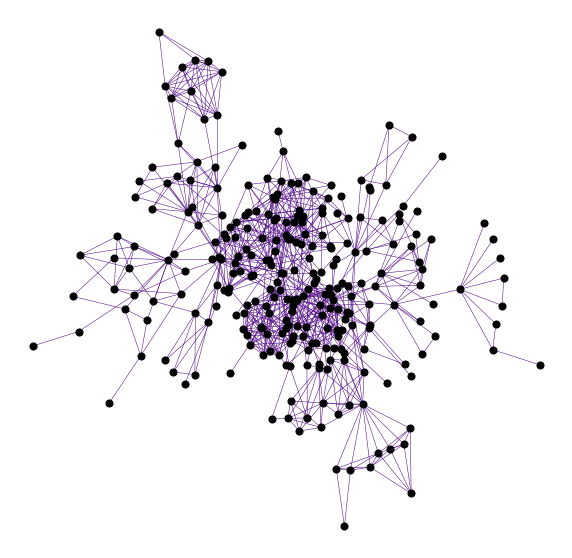

In [50]:
aq_networkFig = plt.figure(figsize=(10, 10))
aq_networkFig_ax1 = aq_networkFig.subplots(1, 1)

aq_network = nx.Graph()
aq_network.add_nodes_from(aq_nodes)
aq_network.add_edges_from(aq_links)

nx.draw_kamada_kawai(aq_network, **g_networkDrawingParameters)
print("N = " + str(aq_network.number_of_nodes()))
print("L = " + str(aq_network.number_of_edges()))

[ 0.78473416  5.         -0.45630527]
0.00040142153067969675


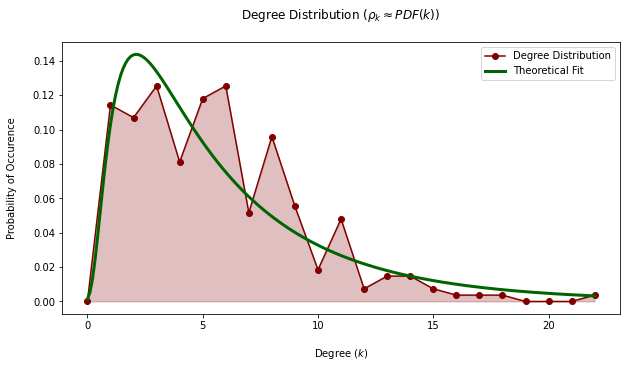

In [194]:
aq_degreeSequence = [d for n, d in aq_network.degree()]

aq_degreePointsPDF_x, aq_degreePointsPDF_y = g_process_degreeSequencePDF(aq_degreeSequence)
aq_degreePointsCDF_x, aq_degreePointsCDF_y = g_process_degreeSequenceCDF(aq_degreeSequence)

aq_curveFit_params, aq_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, aq_degreePointsPDF_x, aq_degreePointsPDF_y, bounds=([0.001, 0.001, -5.], [5., 5., -0.001]))
print(aq_curveFit_params)

aq_DegreeFig = plt.figure(figsize=(10, 5))
aq_DegreeFig_ax1 = aq_DegreeFig.subplots(1, 1)

aq_DegreeFig.subplots_adjust(hspace=0.35)

aq_DegreeFig_ax1.plot(aq_degreePointsPDF_x, aq_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
aq_DegreeFig_ax1.fill_between(aq_degreePointsPDF_x, 0, aq_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
aq_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
aq_DegreeFig_ax1.set_xlabel("\nDegree ($k$)")
aq_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

aq_x = np.linspace(0, 22, num=200)
aq_y = [g_compute_flDistribution(k, *aq_curveFit_params) for k in aq_x]
aq_DegreeFig_ax1.plot(aq_x, aq_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

# aq_DegreeFig_ax2.plot(aq_degreePointsCDF_x, aq_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
# aq_DegreeFig_ax2.fill_between(aq_degreePointsCDF_x, 0, aq_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
# aq_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
# aq_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

# mpl.pyplot.xlabel("\nDegree ($k$)")
aq_DegreeFig_ax1.legend(loc=1)

aq_cost = 0
for k in range(len(aq_degreePointsPDF_x)):
    degVal = aq_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *aq_curveFit_params)
    aq_cost += (degVal - computed) ** 2
aq_cost = aq_cost / len(aq_degreePointsPDF_x)
loss_matrix_X.append(aq_network.number_of_nodes())
loss_matrix_Y.append(aq_cost)

print(aq_cost)

### [AE] Australian Embassy Bombing 2004, Indonesia

In [52]:
ae_node_data = pandas.read_csv("data/AE/AE_Nodes_Public_Version2.csv")
ae_nodes = g_process_node_data(ae_node_data)

ae_link_data = pandas.read_csv("data/AE/AE_Relations_Public_Version2.csv")
ae_links = g_process_link_data(ae_link_data)

N = 27
L = 112


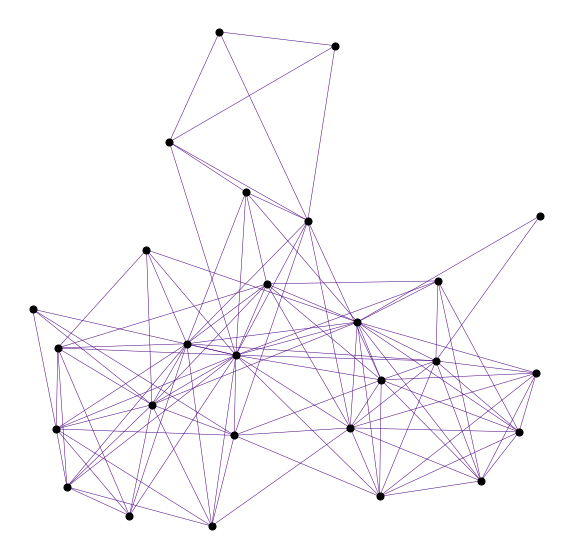

In [54]:
ae_networkFig = plt.figure(figsize=(10, 10))
ae_networkFig_ax1 = ae_networkFig.subplots(1, 1)

ae_network = nx.Graph()
ae_network.add_nodes_from(ae_nodes)
ae_network.add_edges_from(ae_links)

nx.draw_kamada_kawai(ae_network, **g_networkDrawingParameters)
print("N = " + str(ae_network.number_of_nodes()))
print("L = " + str(ae_network.number_of_edges()))

[ 0.19331408 17.87568534 -9.99999995]
0.0009526867976332693


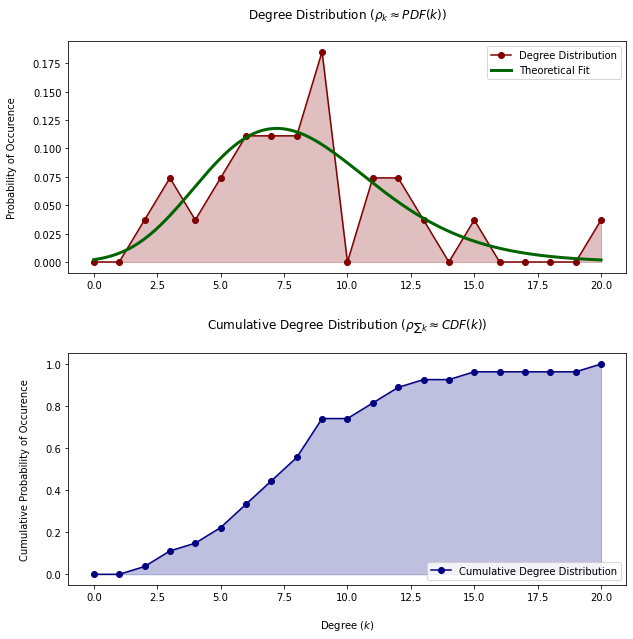

In [113]:
ae_degreeSequence = [d for n, d in ae_network.degree()]

ae_degreePointsPDF_x, ae_degreePointsPDF_y = g_process_degreeSequencePDF(ae_degreeSequence)
ae_degreePointsCDF_x, ae_degreePointsCDF_y = g_process_degreeSequenceCDF(ae_degreeSequence)

ae_curveFit_params, ae_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, ae_degreePointsPDF_x, ae_degreePointsPDF_y, bounds=([0.001, 0.001, -10.], [10., 20., -0.001]))
print(ae_curveFit_params)

ae_DegreeFig = plt.figure(figsize=(10, 10))
ae_DegreeFig_ax1, ae_DegreeFig_ax2 = ae_DegreeFig.subplots(2, 1)

ae_DegreeFig.subplots_adjust(hspace=0.35)

ae_DegreeFig_ax1.plot(ae_degreePointsPDF_x, ae_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
ae_DegreeFig_ax1.fill_between(ae_degreePointsPDF_x, 0, ae_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
ae_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
ae_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

ae_x = np.linspace(0, 20, num=200)
ae_y = [g_compute_flDistribution(k, *ae_curveFit_params) for k in ae_x]
ae_DegreeFig_ax1.plot(ae_x, ae_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

ae_DegreeFig_ax2.plot(ae_degreePointsCDF_x, ae_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
ae_DegreeFig_ax2.fill_between(ae_degreePointsCDF_x, 0, ae_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
ae_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
ae_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
ae_DegreeFig_ax1.legend(loc=1)
ae_DegreeFig_ax2.legend(loc=4)

ae_cost = 0
for k in range(len(ae_degreePointsPDF_x)):
    degVal = ae_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *ae_curveFit_params)
    ae_cost += (degVal - computed) ** 2
ae_cost = ae_cost / len(ae_degreePointsPDF_x)
loss_matrix_X.append(ae_network.number_of_nodes())
loss_matrix_Y.append(ae_cost)

print(ae_cost)

### [BALI1] Bali bombings 2002, Indonesia

In [56]:
bali1_node_data = pandas.read_csv("data/Bali1/Bali1_Nodes_Public_Version2.csv")
bali1_nodes = g_process_node_data(bali1_node_data)

bali1_link_data = pandas.read_csv("data/Bali1/Bali1_Relations_Public_Version2.csv")
bali1_links = g_process_link_data(bali1_link_data)

In [ ]:
print(bali1_nodes)
print(bali1_links)

N = 27
L = 158


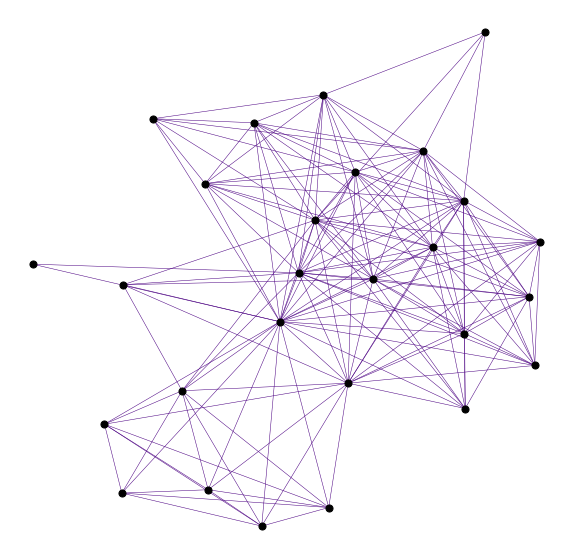

In [57]:
bali1_networkFig = plt.figure(figsize=(10, 10))
bali1_networkFig_ax1 = bali1_networkFig.subplots(1, 1)

bali1_network = nx.Graph()
bali1_network.add_nodes_from(bali1_nodes)
bali1_network.add_edges_from(bali1_links)

nx.draw_kamada_kawai(bali1_network, **g_networkDrawingParameters)
print("N = " + str(bali1_network.number_of_nodes()))
print("L = " + str(bali1_network.number_of_edges()))

[ 0.44594374 13.79997114 -2.35164317]
0.001323739216579148


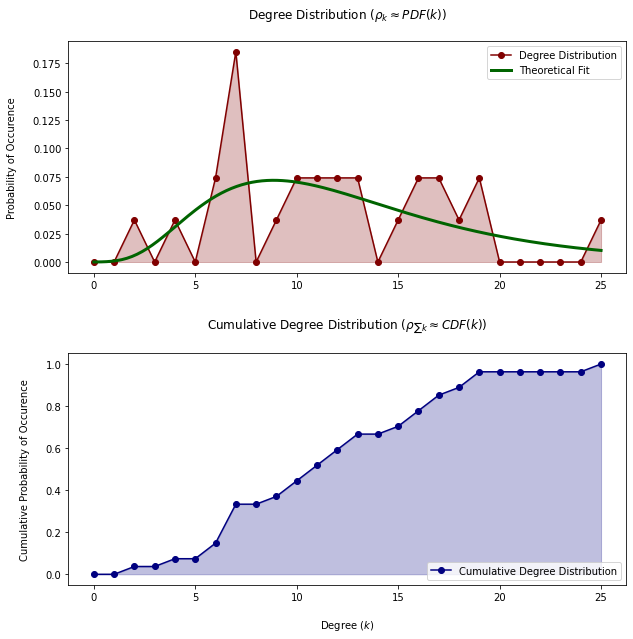

In [114]:
bali1_degreeSequence = [d for n, d in bali1_network.degree()]

bali1_degreePointsPDF_x, bali1_degreePointsPDF_y = g_process_degreeSequencePDF(bali1_degreeSequence)
bali1_degreePointsCDF_x, bali1_degreePointsCDF_y = g_process_degreeSequenceCDF(bali1_degreeSequence)

bali1_curveFit_params, bali1_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, bali1_degreePointsPDF_x, bali1_degreePointsPDF_y, bounds=([0.001, 0.001, -20.], [20., 20., -0.001]))
print(bali1_curveFit_params)

bali1_DegreeFig = plt.figure(figsize=(10, 10))
bali1_DegreeFig_ax1, bali1_DegreeFig_ax2 = bali1_DegreeFig.subplots(2, 1)

bali1_DegreeFig.subplots_adjust(hspace=0.35)

bali1_DegreeFig_ax1.plot(bali1_degreePointsPDF_x, bali1_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
bali1_DegreeFig_ax1.fill_between(bali1_degreePointsPDF_x, 0, bali1_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
bali1_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
bali1_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

bali1_x = np.linspace(0, 25, num=200)
bali1_y = [g_compute_flDistribution(k, *bali1_curveFit_params) for k in bali1_x]
bali1_DegreeFig_ax1.plot(bali1_x, bali1_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

bali1_DegreeFig_ax2.plot(bali1_degreePointsCDF_x, bali1_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
bali1_DegreeFig_ax2.fill_between(bali1_degreePointsCDF_x, 0, bali1_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
bali1_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
bali1_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
bali1_DegreeFig_ax1.legend(loc=1)
bali1_DegreeFig_ax2.legend(loc=4)

bali1_cost = 0
for k in range(len(bali1_degreePointsPDF_x)):
    degVal = bali1_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *bali1_curveFit_params)
    bali1_cost += (degVal - computed) ** 2
bali1_cost = bali1_cost / len(bali1_degreePointsPDF_x)
loss_matrix_X.append(bali1_network.number_of_nodes())
loss_matrix_Y.append(bali1_cost)

print(bali1_cost)

### [BALI2] Bali bombings 2005, Indonesia

In [59]:
bali2_node_data = pandas.read_csv("data/Bali2/Bali2_Nodes_Public_Version2.csv")
bali2_nodes = g_process_node_data(bali2_node_data)

bali2_link_data = pandas.read_csv("data/Bali2/Bali2_Relations_Public_Version2.csv")
bali2_links = g_process_link_data(bali2_link_data)

In [ ]:
print(bali2_nodes)
print(bali2_links)

N = 27
L = 102


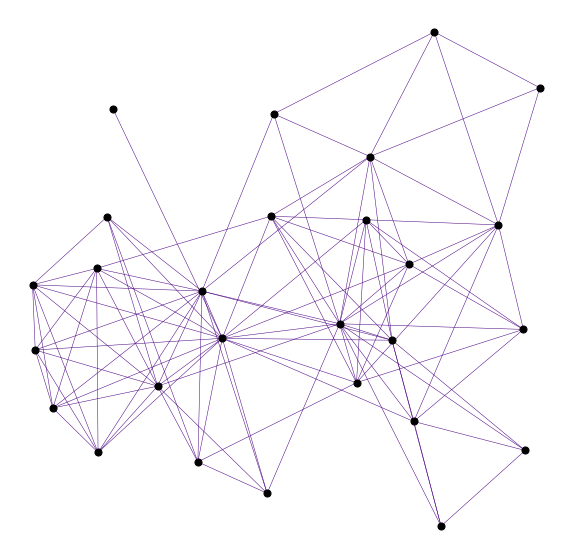

In [60]:
bali2_networkFig = plt.figure(figsize=(10, 10))
bali2_networkFig_ax1 = bali2_networkFig.subplots(1, 1)

bali2_network = nx.Graph()
bali2_network.add_nodes_from(bali2_nodes)
bali2_network.add_edges_from(bali2_links)

nx.draw_kamada_kawai(bali2_network, **g_networkDrawingParameters)
print("N = " + str(bali2_network.number_of_nodes()))
print("L = " + str(bali2_network.number_of_edges()))

[ 2.55957611e-03  9.99999999e+02 -9.93108006e+02]
0.0015572909322247924


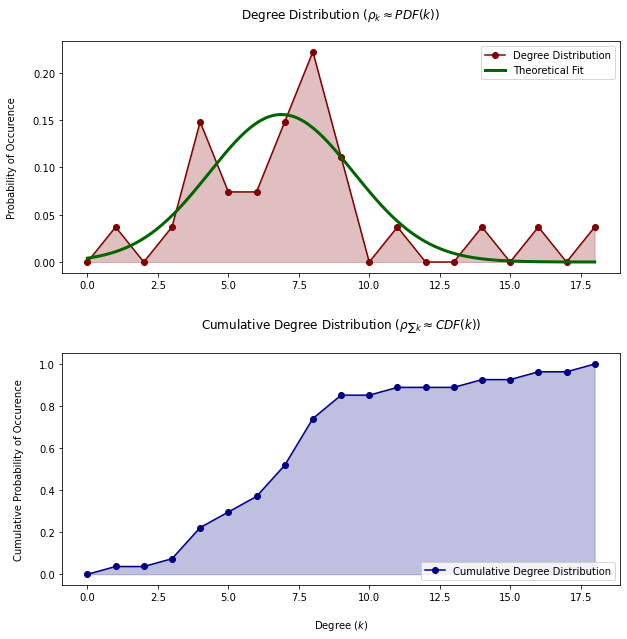

In [115]:
bali2_degreeSequence = [d for n, d in bali2_network.degree()]

bali2_degreePointsPDF_x, bali2_degreePointsPDF_y = g_process_degreeSequencePDF(bali2_degreeSequence)
bali2_degreePointsCDF_x, bali2_degreePointsCDF_y = g_process_degreeSequenceCDF(bali2_degreeSequence)

bali2_curveFit_params, bali2_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, bali2_degreePointsPDF_x, bali2_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(bali2_curveFit_params)

bali2_DegreeFig = plt.figure(figsize=(10, 10))
bali2_DegreeFig_ax1, bali2_DegreeFig_ax2 = bali2_DegreeFig.subplots(2, 1)

bali2_DegreeFig.subplots_adjust(hspace=0.35)

bali2_DegreeFig_ax1.plot(bali2_degreePointsPDF_x, bali2_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
bali2_DegreeFig_ax1.fill_between(bali2_degreePointsPDF_x, 0, bali2_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
bali2_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
bali2_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

bali2_x = np.linspace(0, 18, num=200)
bali2_y = [g_compute_flDistribution(k, *bali2_curveFit_params) for k in bali2_x]
bali2_DegreeFig_ax1.plot(bali2_x, bali2_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

bali2_DegreeFig_ax2.plot(bali2_degreePointsCDF_x, bali2_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
bali2_DegreeFig_ax2.fill_between(bali2_degreePointsCDF_x, 0, bali2_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
bali2_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
bali2_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
bali2_DegreeFig_ax1.legend(loc=1)
bali2_DegreeFig_ax2.legend(loc=4)

bali2_cost = 0
for k in range(len(bali2_degreePointsPDF_x)):
    degVal = bali2_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *bali2_curveFit_params)
    bali2_cost += (degVal - computed) ** 2
bali2_cost = bali2_cost / len(bali2_degreePointsPDF_x)
loss_matrix_X.append(bali2_network.number_of_nodes())
loss_matrix_Y.append(bali2_cost)

print(bali2_cost)

### [CE] Christmas Eve bombings 2000, Indonesia

In [62]:
ce_node_data = pandas.read_csv("data/CE/CE_Nodes_Public_Version2.csv")
ce_nodes = g_process_node_data(ce_node_data)

ce_link_data = pandas.read_csv("data/CE/CE_Relations_Public_Version2.csv")
ce_links = g_process_link_data(ce_link_data)

In [ ]:
print(ce_nodes)
print(ce_links)

N = 45
L = 234


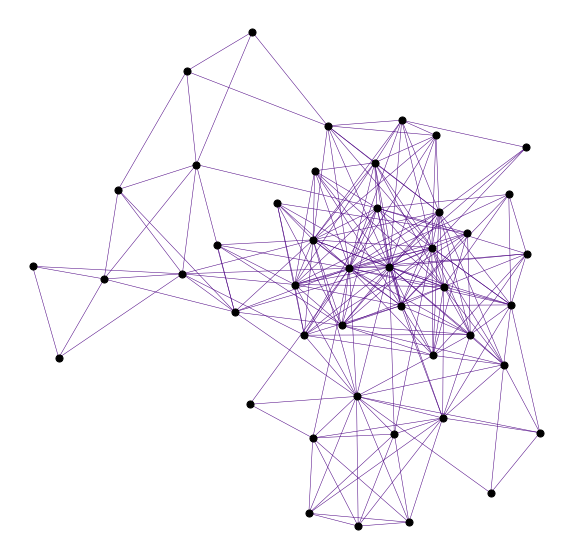

In [63]:
ce_networkFig = plt.figure(figsize=(10, 10))
ce_networkFig_ax1 = ce_networkFig.subplots(1, 1)

ce_network = nx.Graph()
ce_network.add_nodes_from(ce_nodes)
ce_network.add_edges_from(ce_links)

nx.draw_kamada_kawai(ce_network, **g_networkDrawingParameters)
print("N = " + str(ce_network.number_of_nodes()))
print("L = " + str(ce_network.number_of_edges()))

[ 7.17066706e-01  9.02763520e+00 -1.00000000e-03]
0.0007574054459916934


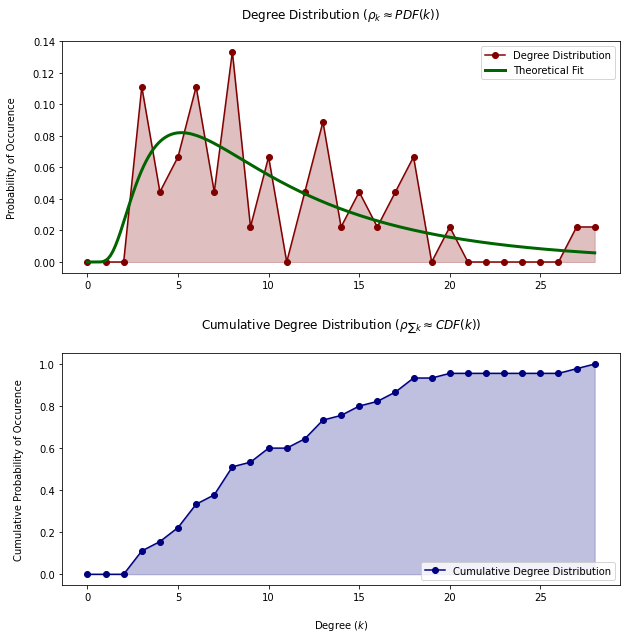

In [116]:
ce_degreeSequence = [d for n, d in ce_network.degree()]

ce_degreePointsPDF_x, ce_degreePointsPDF_y = g_process_degreeSequencePDF(ce_degreeSequence)
ce_degreePointsCDF_x, ce_degreePointsCDF_y = g_process_degreeSequenceCDF(ce_degreeSequence)

ce_curveFit_params, ce_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, ce_degreePointsPDF_x, ce_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(ce_curveFit_params)

ce_DegreeFig = plt.figure(figsize=(10, 10))
ce_DegreeFig_ax1, ce_DegreeFig_ax2 = ce_DegreeFig.subplots(2, 1)

ce_DegreeFig.subplots_adjust(hspace=0.35)

ce_DegreeFig_ax1.plot(ce_degreePointsPDF_x, ce_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
ce_DegreeFig_ax1.fill_between(ce_degreePointsPDF_x, 0, ce_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
ce_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
ce_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

ce_x = np.linspace(0, 28, num=200)
ce_y = [g_compute_flDistribution(k, *ce_curveFit_params) for k in ce_x]
ce_DegreeFig_ax1.plot(ce_x, ce_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

ce_DegreeFig_ax2.plot(ce_degreePointsCDF_x, ce_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
ce_DegreeFig_ax2.fill_between(ce_degreePointsCDF_x, 0, ce_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
ce_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
ce_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
ce_DegreeFig_ax1.legend(loc=1)
ce_DegreeFig_ax2.legend(loc=4)

ce_cost = 0
for k in range(len(ce_degreePointsPDF_x)):
    degVal = ce_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *ce_curveFit_params)
    ce_cost += (degVal - computed) ** 2
ce_cost = ce_cost / len(ce_degreePointsPDF_x)
loss_matrix_X.append(ce_network.number_of_nodes())
loss_matrix_Y.append(ce_cost)

print(ce_cost)

### [GREEKS] November 17 Organization Aggregate Attack Series, Greece

In [65]:
greeks_node_data = pandas.read_csv("data/Greeks/Greeks_Nodes_Public_Version2.csv")
greeks_nodes = g_process_node_data(greeks_node_data)

greeks_link_data = pandas.read_csv("data/Greeks/Greeks_Relations_Public_Version2.csv")
greeks_links = g_process_link_data(greeks_link_data)

In [ ]:
print(greeks_nodes)
print(greeks_links)

N = 18
L = 46


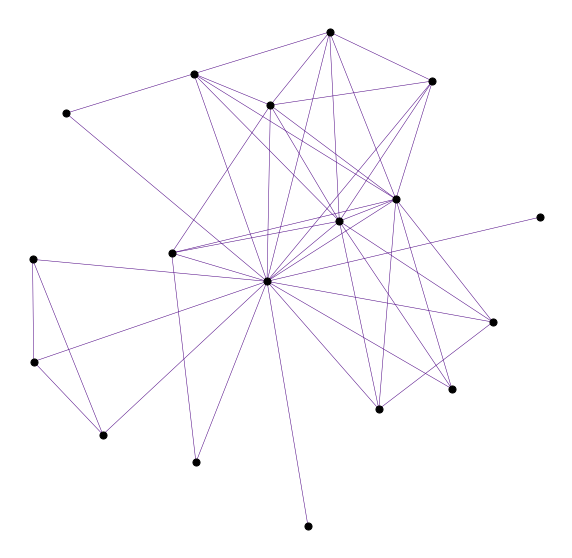

In [66]:
greeks_networkFig = plt.figure(figsize=(10, 10))
greeks_networkFig_ax1 = greeks_networkFig.subplots(1, 1)

greeks_network = nx.Graph()
greeks_network.add_nodes_from(greeks_nodes)
greeks_network.add_edges_from(greeks_links)

nx.draw_kamada_kawai(greeks_network, **g_networkDrawingParameters)
print("N = " + str(greeks_network.number_of_nodes()))
print("L = " + str(greeks_network.number_of_edges()))

[ 0.51518634  5.30645381 -1.34013565]
0.0012156206388331619


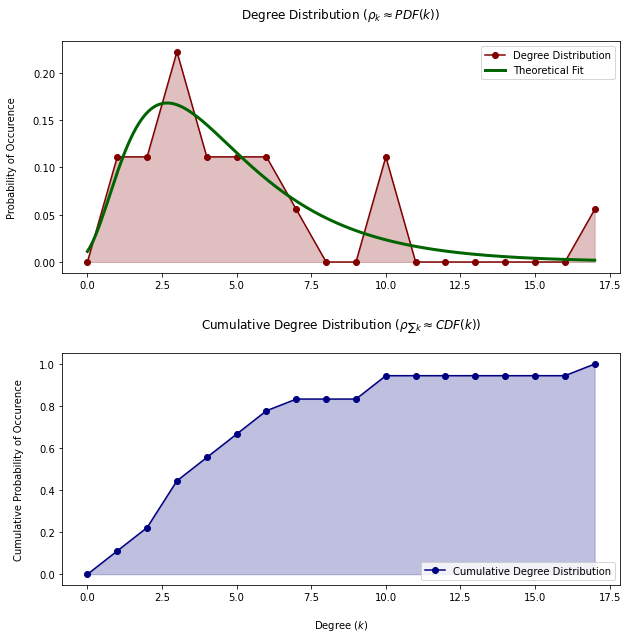

In [117]:
greeks_degreeSequence = [d for n, d in greeks_network.degree()]

greeks_degreePointsPDF_x, greeks_degreePointsPDF_y = g_process_degreeSequencePDF(greeks_degreeSequence)
greeks_degreePointsCDF_x, greeks_degreePointsCDF_y = g_process_degreeSequenceCDF(greeks_degreeSequence)

greeks_curveFit_params, greeks_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, greeks_degreePointsPDF_x, greeks_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(greeks_curveFit_params)

greeks_DegreeFig = plt.figure(figsize=(10, 10))
greeks_DegreeFig_ax1, greeks_DegreeFig_ax2 = greeks_DegreeFig.subplots(2, 1)

greeks_DegreeFig.subplots_adjust(hspace=0.35)

greeks_DegreeFig_ax1.plot(greeks_degreePointsPDF_x, greeks_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
greeks_DegreeFig_ax1.fill_between(greeks_degreePointsPDF_x, 0, greeks_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
greeks_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
greeks_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

greeks_x = np.linspace(0, 17, num=200)
greeks_y = [g_compute_flDistribution(k, *greeks_curveFit_params) for k in greeks_x]
greeks_DegreeFig_ax1.plot(greeks_x, greeks_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

greeks_DegreeFig_ax2.plot(greeks_degreePointsCDF_x, greeks_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
greeks_DegreeFig_ax2.fill_between(greeks_degreePointsCDF_x, 0, greeks_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
greeks_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
greeks_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
greeks_DegreeFig_ax1.legend(loc=1)
greeks_DegreeFig_ax2.legend(loc=4)

greeks_cost = 0
for k in range(len(greeks_degreePointsPDF_x)):
    degVal = greeks_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *greeks_curveFit_params)
    greeks_cost += (degVal - computed) ** 2
greeks_cost = greeks_cost / len(greeks_degreePointsPDF_x)
loss_matrix_X.append(greeks_network.number_of_nodes())
loss_matrix_Y.append(greeks_cost)

print(greeks_cost)

### [HAMBURG] The Hamburg 9/11 Cell 2001, Germany

In [68]:
hamburg_node_data = pandas.read_csv("data/Hamburg/Hamburg_Nodes_Public_Version2.csv")
hamburg_nodes = g_process_node_data(hamburg_node_data)

hamburg_link_data = pandas.read_csv("data/Hamburg/Hamburg_Relations_Public_Version2.csv")
hamburg_links = g_process_link_data(hamburg_link_data)

In [ ]:
print(hamburg_nodes)
print(hamburg_links)

N = 34
L = 122


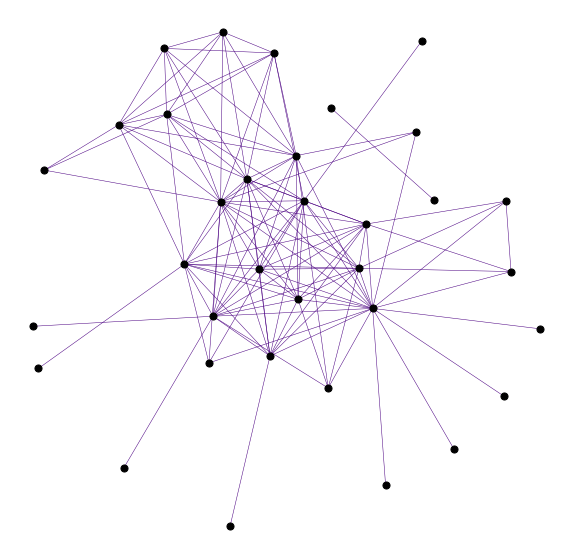

In [69]:
hamburg_networkFig = plt.figure(figsize=(10, 10))
hamburg_networkFig_ax1 = hamburg_networkFig.subplots(1, 1)

hamburg_network = nx.Graph()
hamburg_network.add_nodes_from(hamburg_nodes)
hamburg_network.add_edges_from(hamburg_links)

nx.draw_kamada_kawai(hamburg_network, **g_networkDrawingParameters)
print("N = " + str(hamburg_network.number_of_nodes()))
print("L = " + str(hamburg_network.number_of_edges()))

[ 8.19690833e+01  7.33776585e+03 -2.40699804e-12]
0.0033983929666823545


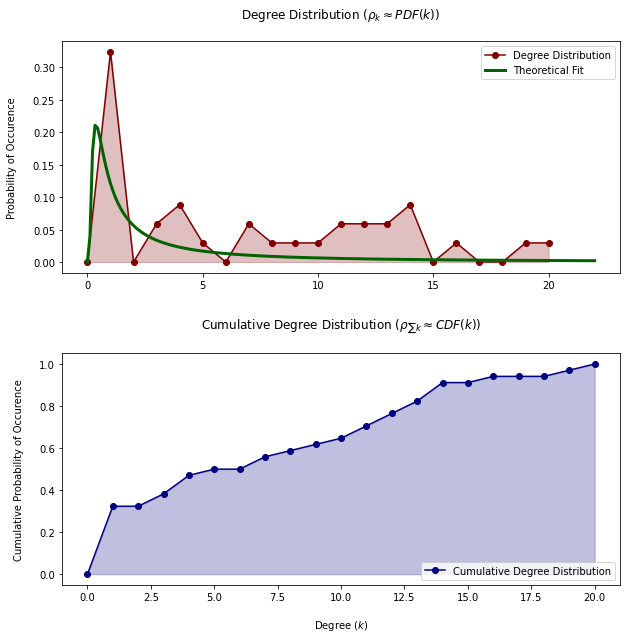

In [118]:
hamburg_degreeSequence = [d for n, d in hamburg_network.degree()]

hamburg_degreePointsPDF_x, hamburg_degreePointsPDF_y = g_process_degreeSequencePDF(hamburg_degreeSequence)
hamburg_degreePointsCDF_x, hamburg_degreePointsCDF_y = g_process_degreeSequenceCDF(hamburg_degreeSequence)

hamburg_curveFit_params, hamburg_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, hamburg_degreePointsPDF_x, hamburg_degreePointsPDF_y, bounds=([0.00000000001, 0.0000000001, -10000.], [10000., 10000., -0.000000000001]))
print(hamburg_curveFit_params)

hamburg_DegreeFig = plt.figure(figsize=(10, 10))
hamburg_DegreeFig_ax1, hamburg_DegreeFig_ax2 = hamburg_DegreeFig.subplots(2, 1)

hamburg_DegreeFig.subplots_adjust(hspace=0.35)

hamburg_DegreeFig_ax1.plot(hamburg_degreePointsPDF_x, hamburg_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
hamburg_DegreeFig_ax1.fill_between(hamburg_degreePointsPDF_x, 0, hamburg_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
hamburg_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
hamburg_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

hamburg_x = np.linspace(0, 22, num=200)
hamburg_y = [g_compute_flDistribution(k, *hamburg_curveFit_params) for k in hamburg_x]
hamburg_DegreeFig_ax1.plot(hamburg_x, hamburg_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

hamburg_DegreeFig_ax2.plot(hamburg_degreePointsCDF_x, hamburg_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
hamburg_DegreeFig_ax2.fill_between(hamburg_degreePointsCDF_x, 0, hamburg_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
hamburg_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
hamburg_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
hamburg_DegreeFig_ax1.legend(loc=1)
hamburg_DegreeFig_ax2.legend(loc=4)

hamburg_cost = 0
for k in range(len(hamburg_degreePointsPDF_x)):
    degVal = hamburg_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *hamburg_curveFit_params)
    hamburg_cost += (degVal - computed) ** 2
hamburg_cost = hamburg_cost / len(hamburg_degreePointsPDF_x)
loss_matrix_X.append(hamburg_network.number_of_nodes())
loss_matrix_Y.append(hamburg_cost)

print(hamburg_cost)

### [JAKARTA] Jakarta 2009 Attack, Indonesia

In [71]:
jakarta_node_data = pandas.read_csv("data/Jakarta/Jakarta 2009_Nodes_Public.csv")
jakarta_nodes = g_process_node_data(jakarta_node_data)

jakarta_link_data = pandas.read_csv("data/Jakarta/Jakarta_Relations_Public.csv")
jakarta_links = g_process_link_data(jakarta_link_data)

In [ ]:
print(jakarta_nodes)
print(jakarta_links)

N = 28
L = 38


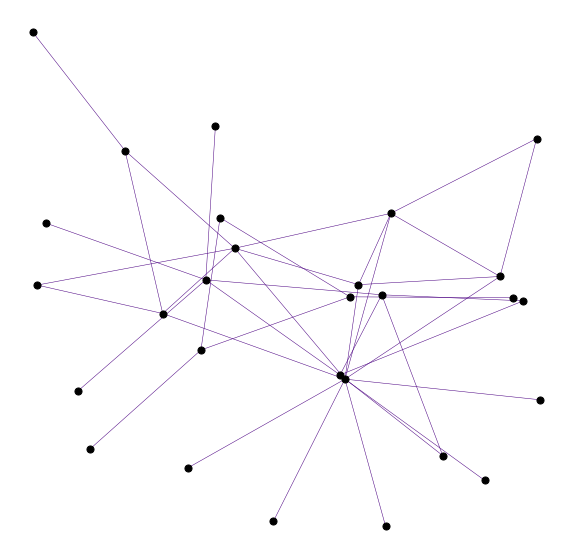

In [72]:
jakarta_networkFig = plt.figure(figsize=(10, 10))
jakarta_networkFig_ax1 = jakarta_networkFig.subplots(1, 1)

jakarta_network = nx.Graph()
jakarta_network.add_nodes_from(jakarta_nodes)
jakarta_network.add_edges_from(jakarta_links)

nx.draw_kamada_kawai(jakarta_network, **g_networkDrawingParameters)
print("N = " + str(jakarta_network.number_of_nodes()))
print("L = " + str(jakarta_network.number_of_edges()))

[ 7.82188482e+01  7.53955003e+03 -1.23547346e-12]
0.011184328088679037


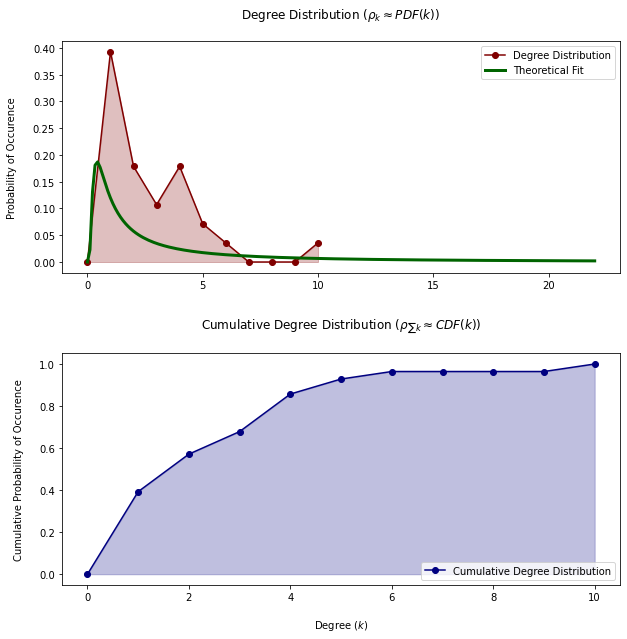

In [119]:
jakarta_degreeSequence = [d for n, d in jakarta_network.degree()]

jakarta_degreePointsPDF_x, jakarta_degreePointsPDF_y = g_process_degreeSequencePDF(jakarta_degreeSequence)
jakarta_degreePointsCDF_x, jakarta_degreePointsCDF_y = g_process_degreeSequenceCDF(jakarta_degreeSequence)

jakarta_curveFit_params, jakarta_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, jakarta_degreePointsPDF_x, jakarta_degreePointsPDF_y, bounds=([0.00000000001, 0.0000000001, -10000.], [10000., 10000., -0.00000000000000001]))
print(jakarta_curveFit_params)

jakarta_DegreeFig = plt.figure(figsize=(10, 10))
jakarta_DegreeFig_ax1, jakarta_DegreeFig_ax2 = jakarta_DegreeFig.subplots(2, 1)

jakarta_DegreeFig.subplots_adjust(hspace=0.35)

jakarta_DegreeFig_ax1.plot(jakarta_degreePointsPDF_x, jakarta_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
jakarta_DegreeFig_ax1.fill_between(jakarta_degreePointsPDF_x, 0, jakarta_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
jakarta_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
jakarta_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

jakarta_x = np.linspace(0, 22, num=200)
jakarta_y = [g_compute_flDistribution(k, *jakarta_curveFit_params) for k in jakarta_x]
jakarta_DegreeFig_ax1.plot(jakarta_x, jakarta_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

jakarta_DegreeFig_ax2.plot(jakarta_degreePointsCDF_x, jakarta_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
jakarta_DegreeFig_ax2.fill_between(jakarta_degreePointsCDF_x, 0, jakarta_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
jakarta_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
jakarta_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
jakarta_DegreeFig_ax1.legend(loc=1)
jakarta_DegreeFig_ax2.legend(loc=4)

jakarta_cost = 0
for k in range(len(jakarta_degreePointsPDF_x)):
    degVal = jakarta_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *jakarta_curveFit_params)
    jakarta_cost += (degVal - computed) ** 2
jakarta_cost = jakarta_cost / len(jakarta_degreePointsPDF_x)
loss_matrix_X.append(jakarta_network.number_of_nodes())
loss_matrix_Y.append(jakarta_cost)

print(jakarta_cost)

### [MADRID] Madrid Train Bombings 2004, Spain

In [74]:
madrid_node_data = pandas.read_csv("data/Madrid/Madrid_Nodes_Public_Version2.csv")
madrid_nodes = g_process_node_data(madrid_node_data)

madrid_link_data = pandas.read_csv("data/Madrid/Madrid_Relations_Public_Version2.csv")
madrid_links = g_process_link_data(madrid_link_data)

In [ ]:
print(madrid_nodes)
print(madrid_links)

N = 54
L = 226


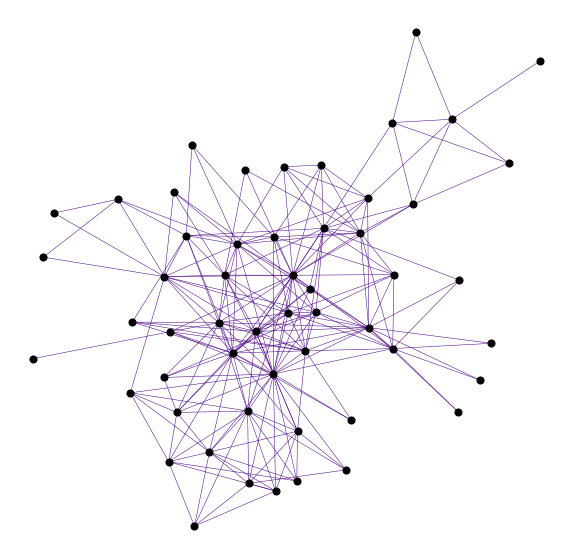

In [75]:
madrid_networkFig = plt.figure(figsize=(10, 10))
madrid_networkFig_ax1 = madrid_networkFig.subplots(1, 1)

madrid_network = nx.Graph()
madrid_network.add_nodes_from(madrid_nodes)
madrid_network.add_edges_from(madrid_links)

nx.draw_kamada_kawai(madrid_network, **g_networkDrawingParameters)
print("N = " + str(madrid_network.number_of_nodes()))
print("L = " + str(madrid_network.number_of_edges()))

[ 0.87139313  7.35098135 -0.33242603]
0.0004061228404263769


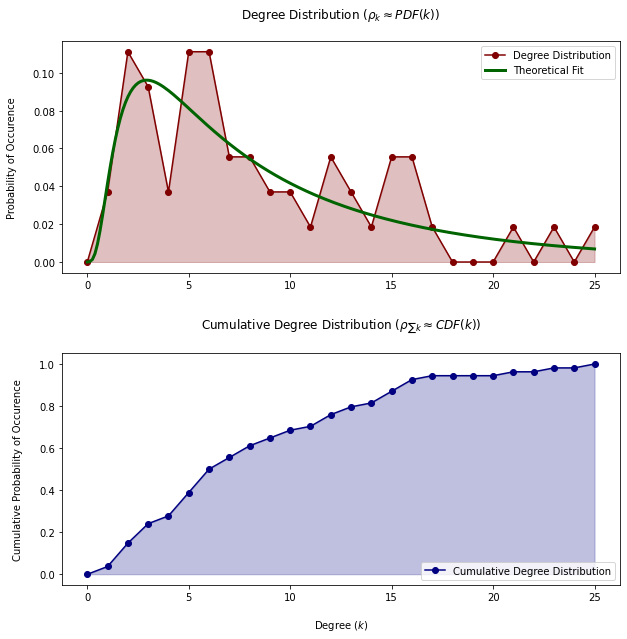

In [120]:
madrid_degreeSequence = [d for n, d in madrid_network.degree()]

madrid_degreePointsPDF_x, madrid_degreePointsPDF_y = g_process_degreeSequencePDF(madrid_degreeSequence)
madrid_degreePointsCDF_x, madrid_degreePointsCDF_y = g_process_degreeSequenceCDF(madrid_degreeSequence)

madrid_curveFit_params, madrid_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, madrid_degreePointsPDF_x, madrid_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(madrid_curveFit_params)

madrid_DegreeFig = plt.figure(figsize=(10, 10))
madrid_DegreeFig_ax1, madrid_DegreeFig_ax2 = madrid_DegreeFig.subplots(2, 1)

madrid_DegreeFig.subplots_adjust(hspace=0.35)

madrid_DegreeFig_ax1.plot(madrid_degreePointsPDF_x, madrid_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
madrid_DegreeFig_ax1.fill_between(madrid_degreePointsPDF_x, 0, madrid_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
madrid_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
madrid_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

madrid_x = np.linspace(0, 25, num=200)
madrid_y = [g_compute_flDistribution(k, *madrid_curveFit_params) for k in madrid_x]
madrid_DegreeFig_ax1.plot(madrid_x, madrid_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

madrid_DegreeFig_ax2.plot(madrid_degreePointsCDF_x, madrid_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
madrid_DegreeFig_ax2.fill_between(madrid_degreePointsCDF_x, 0, madrid_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
madrid_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
madrid_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
madrid_DegreeFig_ax1.legend(loc=1)
madrid_DegreeFig_ax2.legend(loc=4)

madrid_cost = 0
for k in range(len(madrid_degreePointsPDF_x)):
    degVal = madrid_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *madrid_curveFit_params)
    madrid_cost += (degVal - computed) ** 2
madrid_cost = madrid_cost / len(madrid_degreePointsPDF_x)
loss_matrix_X.append(madrid_network.number_of_nodes())
loss_matrix_Y.append(madrid_cost)

print(madrid_cost)

### [PAR] Philippines Ambassador Residence Bombing 2000, Jakarta

In [77]:
par_node_data = pandas.read_csv("data/par/PAR_Nodes_Public_Version2.csv")
par_nodes = g_process_node_data(par_node_data)

par_link_data = pandas.read_csv("data/par/PAR_Relations_Public_Version2.csv")
par_links = g_process_link_data(par_link_data)

In [ ]:
print(par_nodes)
print(par_links)

N = 16
L = 69


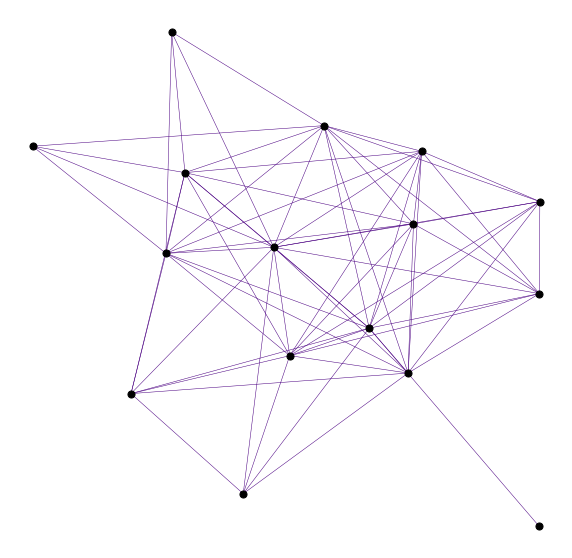

In [78]:
par_networkFig = plt.figure(figsize=(10, 10))
par_networkFig_ax1 = par_networkFig.subplots(1, 1)

par_network = nx.Graph()
par_network.add_nodes_from(par_nodes)
par_network.add_edges_from(par_links)

nx.draw_kamada_kawai(par_network, **g_networkDrawingParameters)
print("N = " + str(par_network.number_of_nodes()))
print("L = " + str(par_network.number_of_edges()))

[ 3.39204099e-03  9.99999985e+02 -9.90028266e+02]
0.004354029880427057


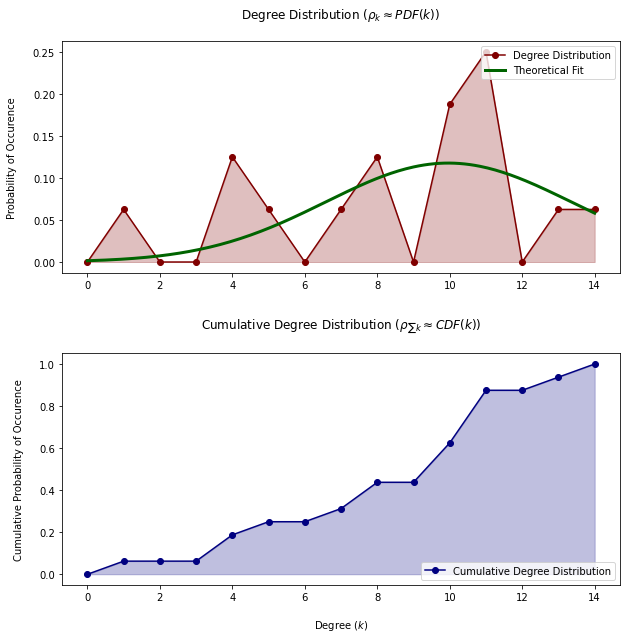

In [121]:
par_degreeSequence = [d for n, d in par_network.degree()]

par_degreePointsPDF_x, par_degreePointsPDF_y = g_process_degreeSequencePDF(par_degreeSequence)
par_degreePointsCDF_x, par_degreePointsCDF_y = g_process_degreeSequenceCDF(par_degreeSequence)

par_curveFit_params, par_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, par_degreePointsPDF_x, par_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(par_curveFit_params)

par_DegreeFig = plt.figure(figsize=(10, 10))
par_DegreeFig_ax1, par_DegreeFig_ax2 = par_DegreeFig.subplots(2, 1)

par_DegreeFig.subplots_adjust(hspace=0.35)

par_DegreeFig_ax1.plot(par_degreePointsPDF_x, par_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
par_DegreeFig_ax1.fill_between(par_degreePointsPDF_x, 0, par_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
par_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
par_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

par_x = np.linspace(0, 14, num=200)
par_y = [g_compute_flDistribution(k, *par_curveFit_params) for k in par_x]
par_DegreeFig_ax1.plot(par_x, par_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

par_DegreeFig_ax2.plot(par_degreePointsCDF_x, par_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
par_DegreeFig_ax2.fill_between(par_degreePointsCDF_x, 0, par_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
par_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
par_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
par_DegreeFig_ax1.legend(loc=1)
par_DegreeFig_ax2.legend(loc=4)

par_cost = 0
for k in range(len(par_degreePointsPDF_x)):
    degVal = par_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *par_curveFit_params)
    par_cost += (degVal - computed) ** 2
par_cost = par_cost / len(par_degreePointsPDF_x)
loss_matrix_X.append(par_network.number_of_nodes())
loss_matrix_Y.append(par_cost)

print(par_cost)

### [SEA] Southeast Asian Aggregate Attack Series 2005, Indonesia

In [82]:
sea_node_data = pandas.read_csv("data/sea/SEA_Nodes_Public_Version2.csv")
sea_nodes = g_process_node_data(sea_node_data)

sea_link_data = pandas.read_csv("data/sea/SEA_Relations_Public_Version2.csv")
sea_links = g_process_link_data(sea_link_data)

In [ ]:
print(sea_nodes)
print(sea_links)

N = 108
L = 565


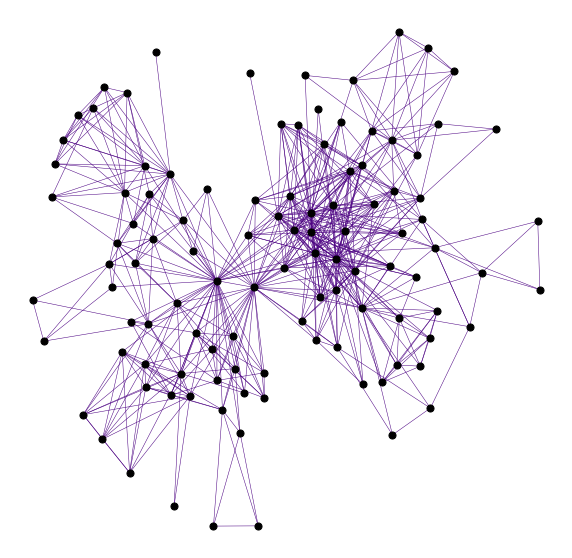

In [83]:
sea_networkFig = plt.figure(figsize=(10, 10))
sea_networkFig_ax1 = sea_networkFig.subplots(1, 1)

sea_network = nx.Graph()
sea_network.add_nodes_from(sea_nodes)
sea_network.add_edges_from(sea_links)

nx.draw_kamada_kawai(sea_network, **g_networkDrawingParameters)
print("N = " + str(sea_network.number_of_nodes()))
print("L = " + str(sea_network.number_of_edges()))

In [84]:
communities = list(nx.algorithms.community.greedy_modularity_communities(sea_network))
count = len(communities)

node_color_attributes = {}

hoohaa = [None for k in sea_network.nodes()]
for k in range(len(communities)):
    for node in communities[k]:
        if k == 0:
            node_color_attributes[node] = "red"
        elif k == 1:
            node_color_attributes[node] = "blue"
        elif k == 2:
            node_color_attributes[node] = "green"
        else:
            node_color_attributes[node] = "orange"

nx.set_node_attributes(sea_network, node_color_attributes, "value")

[ 0.35194051 12.93371033 -4.92661495]
0.00011623691443905325


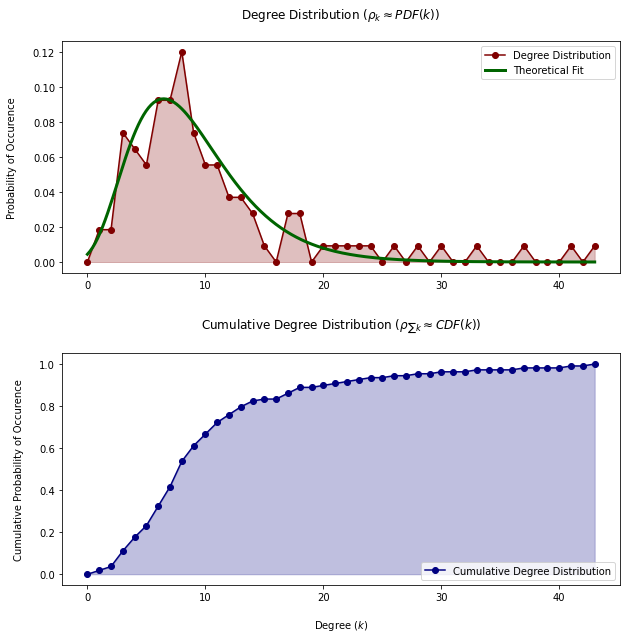

In [122]:
sea_degreeSequence = [d for n, d in sea_network.degree()]

sea_degreePointsPDF_x, sea_degreePointsPDF_y = g_process_degreeSequencePDF(sea_degreeSequence)
sea_degreePointsCDF_x, sea_degreePointsCDF_y = g_process_degreeSequenceCDF(sea_degreeSequence)

sea_curveFit_params, sea_curveFit_covar = scipy.optimize.curve_fit(g_compute_flDistribution, sea_degreePointsPDF_x, sea_degreePointsPDF_y, bounds=([0.001, 0.001, -1000.], [1000., 1000., -0.001]))
print(sea_curveFit_params)

sea_DegreeFig = plt.figure(figsize=(10, 10))
sea_DegreeFig_ax1, sea_DegreeFig_ax2 = sea_DegreeFig.subplots(2, 1)

sea_DegreeFig.subplots_adjust(hspace=0.35)

sea_DegreeFig_ax1.plot(sea_degreePointsPDF_x, sea_degreePointsPDF_y, 'o-', color=g_degreeDrawingParameters["pdfColor"], label="Degree Distribution")
sea_DegreeFig_ax1.fill_between(sea_degreePointsPDF_x, 0, sea_degreePointsPDF_y, color=g_degreeDrawingParameters["pdfColor"], alpha=g_degreeDrawingParameters["alpha"])
sea_DegreeFig_ax1.set_ylabel("Probability of Occurence\n")
sea_DegreeFig_ax1.set_title(r"Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")

sea_x = np.linspace(0, 43, num=200)
sea_y = [g_compute_flDistribution(k, *sea_curveFit_params) for k in sea_x]
sea_DegreeFig_ax1.plot(sea_x, sea_y, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

sea_DegreeFig_ax2.plot(sea_degreePointsCDF_x, sea_degreePointsCDF_y, 'o-', color=g_degreeDrawingParameters["cdfColor"], label="Cumulative Degree Distribution")
sea_DegreeFig_ax2.fill_between(sea_degreePointsCDF_x, 0, sea_degreePointsCDF_y, color=g_degreeDrawingParameters["cdfColor"], alpha=g_degreeDrawingParameters["alpha"])
sea_DegreeFig_ax2.set_ylabel("Cumulative Probability of Occurence\n")
sea_DegreeFig_ax2.set_title(r"Cumulative Degree Distribution ($\rho_{\sum k} \approx CDF(k)$)" + "\n")

mpl.pyplot.xlabel("\nDegree ($k$)")
sea_DegreeFig_ax1.legend(loc=1)
sea_DegreeFig_ax2.legend(loc=4)

sea_cost = 0
for k in range(len(sea_degreePointsPDF_x)):
    degVal = sea_degreePointsPDF_y[k]
    computed = g_compute_flDistribution(k, *sea_curveFit_params)
    sea_cost += (degVal - computed) ** 2
sea_cost = sea_cost / len(sea_degreePointsPDF_x)
loss_matrix_X.append(sea_network.number_of_nodes())
loss_matrix_Y.append(sea_cost)

print(sea_cost)

## Further Analysis

Now that we have determined that the *fatigue life* distribution is a good model for the degree distribution of covert networks, we can try to find other trends like this. I hypothesize there are 5 general laws:

- [X] $\rho_k$ is a fatigue life distribution.
- [ ] $C \propto B^{-\lambda}$, where $\lambda$ is a tunable parameter.
- [ ] $N \propto A^{-\alpha}$, where $\alpha$ is a tunable parameter.
- [ ] $N \propto \omega^{-\nu}$, where $\nu$ is a tunable parameter.
- [ ] $N_c \propto \sqrt{N}$

If we obtain such parameter definitions, we will be possibly able to develop a rigorous model of covert network topological evolution.

In [153]:
all_networks = [
    aq_network,
    ae_network,
    bali1_network,
    bali2_network,
    ce_network,
    greeks_network,
    hamburg_network,
    jakarta_network,
    madrid_network,
    par_network,
    sea_network
]

In [273]:
network_number = 6


# from 1 to 11

In [274]:
network = all_networks[network_number - 1]

### 2nd thing

In [275]:
B = nx.betweenness_centrality(network)
B_list = list(B.values())

nx.set_node_attributes(network, nx.betweenness_centrality(network), "betweenness")

In [276]:
C = nx.clustering(network)
C_list = list(C.values())

Text(0.5, 1.0, 'C versus B')

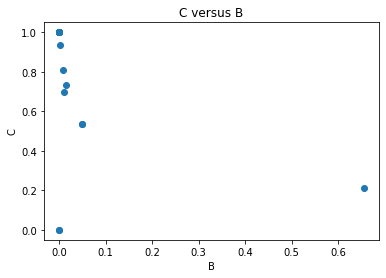

In [277]:
plt.scatter(B_list, C_list)
plt.xlabel("B")
plt.ylabel("C")
plt.title("C versus B")

### 3rd thing

18


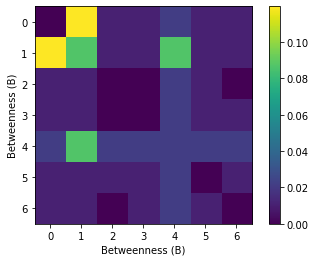

In [278]:
A = nx.attribute_mixing_matrix(network, "betweenness")

# hoohaa = plt.figure(figsize=(10, 10))
# ax1 = hoohaa.subplots(1, 1)
# ax1.hist(x_hoohaa, y_hoohaa)

plt.imshow(A)
plt.colorbar()
plt.xlabel("Betweenness (B)")
plt.ylabel("Betweenness (B)")
print(network.number_of_nodes())

### 4th thing

0.9090340900298718


Text(0.5, 1.0, 'Network Diameter versus Network Size\n')

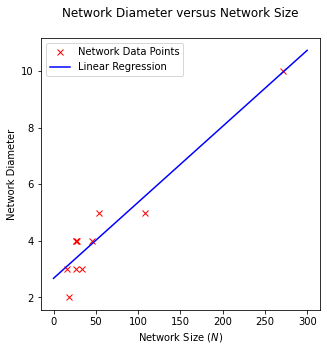

In [289]:
hoohaa = plt.figure(figsize=(5, 5))
ax1 = hoohaa.subplots(1, 1)

hoohaax = []
hoohaay = []

for nw in all_networks:
    N = nw.number_of_nodes()
    giant = nw.subgraph(list(max(nx.connected_components(nw), key=len)))
    d = nx.diameter(giant)
    hoohaax.append(N)
    hoohaay.append(d)
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hoohaax, hoohaay)

moomaax = np.linspace(0, 300, 300)
moomaay = [intercept + (slope * k) for k in moomaax]

print(r_value ** 2)

ax1.plot(hoohaax, hoohaay, "rx", label="Network Data Points")
ax1.plot(moomaax, moomaay, "b-", label="Linear Regression")
ax1.legend()
ax1.set_xlabel("Network Size ($N$)")
ax1.set_ylabel("Network Diameter")
ax1.set_title("Network Diameter versus Network Size\n")

0.556828783849813


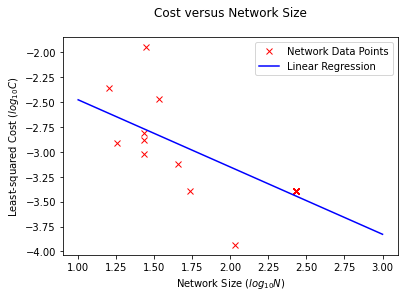

In [204]:
log_loss_matrix_X = [np.log10(k) for k in loss_matrix_X]
log_loss_matrix_Y = [np.log10(k) for k in loss_matrix_Y]

plt.plot(log_loss_matrix_X, log_loss_matrix_Y, "rx", label="Network Data Points")
plt.xlabel("Network Size ($log_{10} N$)")
plt.ylabel("Least-squared Cost ($log_{10} C$)")
plt.title("Cost versus Network Size\n")

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_loss_matrix_X, log_loss_matrix_Y)

hoohaaeo = np.linspace(1, 3, 100)
hoohaaeoy = [intercept + (slope * k) for k in hoohaaeo]

plt.plot(hoohaaeo, hoohaaeoy, "b-", label="Linear Regression")
plt.legend()
print(r_value ** 2)